In [1]:
import numpy as np
import os

# PyToF Tutorial

After a successful installation, the class $\texttt{ClassToF}$ can be imported via

In [2]:
from PyToF import ClassToF

It contains all functionalities of the PyToF package. To create a class instance, call

In [3]:
X = ClassToF.ToF()

No reference radius supplied by the user. PyToF assumes R_ref = R_phys.


Not supplying any arguments just initialises the class with its standard parameters. The details are listed in the function $\texttt{\_default\_opts()}$ in the file $\texttt{ClassToF.py}$. In a nutshell, the standard parameters correspond to a 4th order Theory of Figures implementation, reasonable numerical parameters, and the physical properties of the planet Jupiter. Furthermore, the Bessel solutions for the gravitational moments $J_{n}$ of a single polytrope Jupiter model from $\textit{Wisdom \& Hubbard 2016}$ ($\texttt{10.1016/j.icarus.2015.12.030}$) are saved in the default parameters. A few examples:

In [4]:
print('Order of the Theory of Figures to be used:                              ', X.opts['order'])
print('Mass of the planet in SI units:                                         ', X.opts['M_phys'])
print('Reference radius of the planet in SI units:                             ', X.opts['R_ref'])
print('Physical radius of the planet in SI units, including type specification:', X.opts['R_phys'])
print('Initial rotation period of the planet in SI units:                      ', X.opts['Period'])
print('A few Wisdom & Hubbard 2016 Bessel values for J_2n:                     ', X.opts['Target_Js'][:4])

Order of the Theory of Figures to be used:                               4
Mass of the planet in SI units:                                          1.8982532431065258e+27
Reference radius of the planet in SI units:                              71492000
Physical radius of the planet in SI units, including type specification: [71492000, 'equatorial']
Initial rotation period of the planet in SI units:                       35729.699778131784
A few Wisdom & Hubbard 2016 Bessel values for J_2n:                      [ 1.39885109e-02 -5.31828100e-04  3.01183229e-05 -2.13211571e-06]


This tutorial is divided up into the following chapters: 
 - $\textbf{Chapter 1}$ introduces basic functionalities using the example of a barotrope, a function that describes the pressure-density relation $\rho=\rho(P)$ within the planet.
 - $\textbf{Chapter 2}$ showcases a few built-in plotting functionalities provided by PyToF.
 - $\textbf{Chapter 3}$ explains how to use PyToF for an arbitrary planet and a user-provided density profile including a constraint the outermost part of the planet ("atmosphere").
 - $\textbf{Chapter 4}$ introduces how to find parameterized solutions of an arbitrary planet using a MCMC algorithm.
 - $\textbf{Chapter 5}$ showcases more built-in plotting functionalities relevant for the methods introduced in chapter 4.

## Chapter 1: Basic functionalities
Using the Jupiter single polytrope model by $\textit{Wisdom \& Hubbard 2016}$ ($\texttt{10.1016/j.icarus.2015.12.030}$)

We consider the simplest model, a single polytrope $\rho(P)=\sqrt{P/K}$, just like in $\textit{Wisdom \& Hubbard 2016}$ ($\texttt{10.1016/j.icarus.2015.12.030}$), that describes the interior of the planet. Note that in the case of a single polytrope, the constant $K$ can be set to an arbitrary value, since the density is renormalised in each iteration to match the initially provided mass.

In [5]:
def barotrope(P, K): 
    return np.sqrt(P/K)
    
X.opts['baro_param_init'] = [1] #sets K=1
X.set_barotrope(barotrope)

After setting the barotrope function, we can call the Theory of Figures algorithm to find a self-consistent solution. For all the details, we refer to Appendix A in $\textit{Morf et al. 2024}$ ($\texttt{10.1051/0004-6361/202450698}$). In PyToF, this is done by calling $\texttt{X.relax\_to\_barotrope()}$:

In [6]:
number_of_iterations = X.relax_to_barotrope()
print('Number of iterations used by the algorithm:', number_of_iterations)

Number of iterations used by the algorithm: 21


We see how many iterations the algorithm needed to converge on a solution. Convergence is achieved when the gravitational moments $J_{n}$, the densities $\rho$, and the rotational parameter $m=\frac{(2\pi / P_\text{rot})^2 l_\text{max}^3}{GM}$ stop changing between iterations. $P_\text{rot}$ is the rotation period, $l_\text{max}$ is the Theory of Figures notation for the average radius of the outermost spheroid shell, $G$ is Newton's Constant, and $M$ is the mass of the planet. The relative tolerances that decide if convergence has been reached are:

In [7]:
print('Relative tolerance in the iterative procedure for the Js:                  ', X.opts['dJ_tol'])
print('Relative tolerance in the iterative procedure for the rotational parameter:', X.opts['drot_tol'])
print('Relative tolerance in the iterative procedure for the densities:           ', X.opts['drho_tol'])

Relative tolerance in the iterative procedure for the Js:                   1e-10
Relative tolerance in the iterative procedure for the rotational parameter: 1e-10
Relative tolerance in the iterative procedure for the densities:            1e-10


Note that there is a maximal number of iterations to prevent unreasonable runtimes:

In [8]:
print('Default maximal number of iterations for a barotrope:', X.opts['MaxIterBar'])

Default maximal number of iterations for a barotrope: 100


Exceeding the maximum number of iterations will result in a warning message. We can use $\texttt{X.\_set\_IC()}$ to clear all previously calculated values and redo the calculation and force fewer iterations to see the warning message:

In [9]:
X.opts['MaxIterBar'] = number_of_iterations-1
print('New maximal number of iterations for a barotrope:', X.opts['MaxIterBar'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

X.opts['MaxIterBar'] = 100

New maximal number of iterations for a barotrope: 20

CONVERGENCE WARNING: drot = 2e-12 < 1e-10 = drot_tol, dJ = 4e-10 > 1e-10 = dJ_tol, drho = 2e-12 < 1e-10 = drho_tol after MaxIterBar = 20 iterations.


We can control how much information is provided by PyToF with the verbosity option. $0$ corresponds to no console output, $1$ and $2$ are intermediate options, $3$ can result in a lot of console output:

In [10]:
print('Default verbosity:', X.opts['verbosity'])
X.opts['verbosity'] = 3
print('New verbosity:    ', X.opts['verbosity'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

X.opts['verbosity'] = 0

Default verbosity: 0
New verbosity:     3
Convergence warning: max(dJs) = 1e+00 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 4.24e-03 seconds.
Convergence warning: max(dJs) = 3e-01 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 2.75e-03 seconds.
Convergence warning: max(dJs) = 8e-02 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 3.07e-03 seconds.
Convergence warning: max(dJs) = 6e-02 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 3.17e-03 seconds.
Convergence warning: max(dJs) = 2e-02 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 3.16e-03 seconds.
Convergence warning: max(dJs) = 8e-03 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 2.78e-03 seconds.
Convergence warning: max(dJs) = 2e-03 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 2.66e-03 seconds.
Convergence warning: max(dJs) = 7e-04 > 1e-10 after maxiter = 2 iterations.
Relaxing to shape done in 2.89e-03 seconds

The gravitational moments calculated are saved in $\texttt{X.Js}$ and can be compared to the values of $\textit{Wisdom \& Hubbard 2016}$ ($\texttt{10.1016/j.icarus.2015.12.030}$) stored in $\texttt{X.opts['Target\_Js']}$:

In [11]:
print('PyToF solutions:        ', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i])                for i in range(1,5)])
print('W&H 16 Bessel solutions:', ['J_'+str(2*i+2) +' = ' + "{:.4e}".format(X.opts['Target_Js'][i]) for i in range(4)])

PyToF solutions:         ['J_2 = 1.3989e-02', 'J_4 = -5.3198e-04', 'J_6 = 2.9862e-05', 'J_8 = -2.3365e-06']
W&H 16 Bessel solutions: ['J_2 = 1.3989e-02', 'J_4 = -5.3183e-04', 'J_6 = 3.0118e-05', 'J_8 = -2.1321e-06']


The PyToF numbers can sometimes be improved by going to a higher number of layers:

In [12]:
print('Default number of layers:', X.opts['N'])
X.opts['N'] = 2**12
print('New number of layers:    ', X.opts['N'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

print('PyToF solutions:        ', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i])                for i in range(1,5)])
print('W&H 16 Bessel solutions:', ['J_'+str(2*i+2) +' = ' + "{:.4e}".format(X.opts['Target_Js'][i]) for i in range(4)])

X.opts['N'] = 2**10

Default number of layers: 1024
New number of layers:     4096
PyToF solutions:         ['J_2 = 1.3988e-02', 'J_4 = -5.3196e-04', 'J_6 = 2.9860e-05', 'J_8 = -2.3359e-06']
W&H 16 Bessel solutions: ['J_2 = 1.3989e-02', 'J_4 = -5.3183e-04', 'J_6 = 3.0118e-05', 'J_8 = -2.1321e-06']


In this case, more layers does not improve the situation. Therefore it is better to go to a higher order of the Theory of Figures (either 7th oder 10th order):

In [13]:
print('Default ToF order:', X.opts['order'])
X.opts['order'] = 10
print('New ToF order:    ', X.opts['order'])

X._set_IC()
number_of_iterations = X.relax_to_barotrope()

print('PyToF solutions:        ', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i])                for i in range(1,5)])
print('W&H 16 Bessel solutions:', ['J_'+str(2*i+2) +' = ' + "{:.4e}".format(X.opts['Target_Js'][i]) for i in range(4)])

X.opts['order'] = 4

Default ToF order: 4
New ToF order:     10
PyToF solutions:         ['J_2 = 1.3989e-02', 'J_4 = -5.3185e-04', 'J_6 = 3.0120e-05', 'J_8 = -2.1323e-06']
W&H 16 Bessel solutions: ['J_2 = 1.3989e-02', 'J_4 = -5.3183e-04', 'J_6 = 3.0118e-05', 'J_8 = -2.1321e-06']


For an overview of accuracy and convergence, see the file $\texttt{PyToF\_Accuracy\_and\_Convergence.ipynb}$. Based on these results, $\texttt{PyToF}$ provides error estimates that are saved to $\texttt{X.Js\_error}$ if no binning and no differential rotation is used:

In [14]:
print('PyToF solutions:', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i]) + ' +/- ' + "{:.1e}".format(X.Js_error[i]) for i in range(1,5)])

PyToF solutions: ['J_2 = 1.3989e-02 +/- 2.8e-07', 'J_4 = -5.3185e-04 +/- 2.1e-08', 'J_6 = 3.0120e-05 +/- 1.8e-09', 'J_8 = -2.1323e-06 +/- 1.8e-10']


The calculated average radii $l_i$ of a spheroid shell, their densities $\rho_i$, and their pressures $P_i$ ($i \in \{ 1, \dots, \texttt{X.opts['N']} \}$) can be accessed via $\texttt{X.li, X.rhoi, X.Pi}$. To get the 2D spheroid coordinates $r=r_{l_i}(\mu)$ of a shell with density $\rho_i$, pressure $P_i$, and $\mu = \cos\vartheta$ being the cosine of the colatitude, one can call $\texttt{X.get\_r\_l\_mu()}$. The normalized moment of inertia $I/(Ml_\text{max}^2)$ can be calculated with $\texttt{X.get\_NMoI()}$. We will plot these results in the next chapter.

In [15]:
print('Shape of the average radii, densities, and pressure arrays:', np.shape(X.li), np.shape(X.rhoi), np.shape(X.Pi))

mu = np.cos(np.linspace(0, np.pi, 180))
print('Shape of the 2D coordinates of the spheroids:              ', np.shape(X.get_r_l_mu(mu)))

print('NMoI:                                                      ', "{:.4f}".format(X.get_NMoI()))

Shape of the average radii, densities, and pressure arrays: (1024,) (1024,) (1024,)
Shape of the 2D coordinates of the spheroids:               (1024, 180)
NMoI:                                                       0.2702


## Chapter 2: Built-in plotting functionalities I
Using the Jupiter single polytrope model by $\textit{Wisdom \& Hubbard 2016}$ ($\texttt{10.1016/j.icarus.2015.12.030}$)

PyToF provides the functions $\texttt{X.plot\_xy(), X.plot\_shape(), X.plot\_ss()}$ (and more) for plotting. The default plotting options are listed in the $\texttt{\_default\_}$-functions in the file $\texttt{PlotToF.py}$. The function $\texttt{X.plot\_xy()}$ needs two integer numbers $x,y \in \{0,1,2,3\}$ as arguments that correspond to:

 - 0: Average normalized radii of the spheroid shells
 - 1: Mass enclosed by the spheroid shells
 - 2: Densities of the spheroid shells
 - 3: Pressures of the spheroid shells

Therefore to plot e.g. the densities of the spheroid shells as a function of the average normalized radii of the spheroid shells, we call:

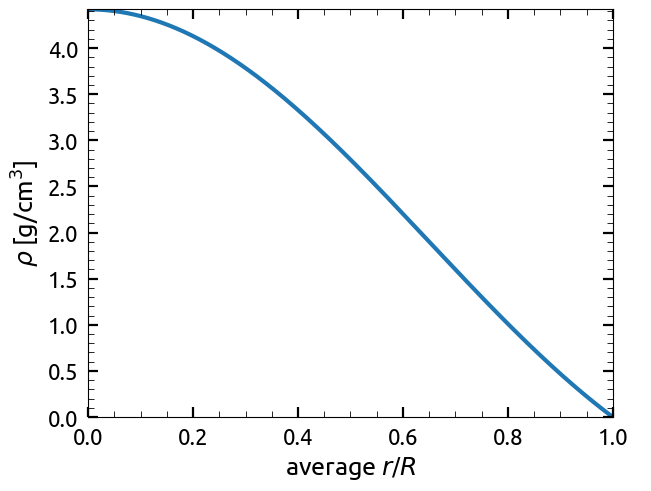

In [16]:
X.plot_xy(0,2)

We can supply any $\texttt{matplotlib}$ keywords (see $\texttt{https://matplotlib.org/stable/users/explain/customizing.html}$):

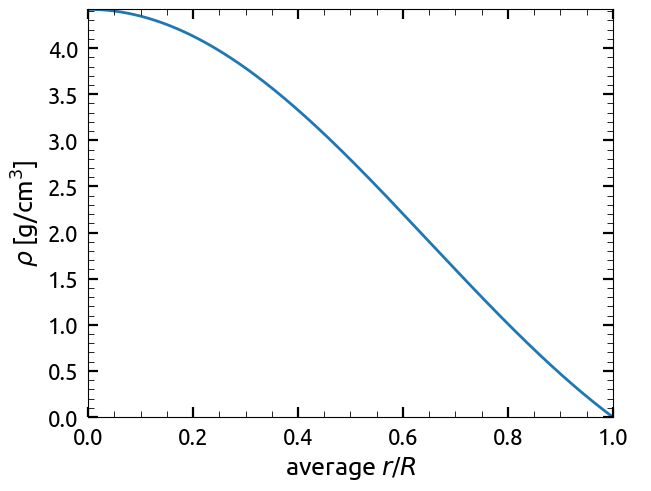

In [17]:
mpl_kwargs = {'lines.linewidth': 2}

X.plot_xy(0,2, **mpl_kwargs)

We can supply exactly the following further keywords:

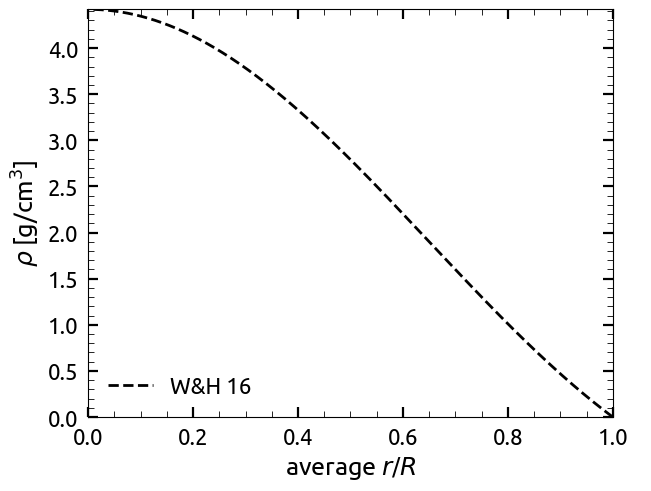

In [18]:
plot_xy_kwargs = {'color'    : 'k' , 'linestyle' : '--'        , 'label'      : 'W&H 16' , 'zorder'        : 1    , 
                  'do_legend': True, 'loc_legend': 'lower left', 'ncol_legend': 3        , 'frameon_legend': False, 'bbox_to_anchor_legend': (0.0, 0.0),
                  'do_save'  : True, 'path_name' : os.getcwd() , 'fig_name'   : 'plot_xy', 'format'        : 'png', 'transparent'          : False}

X.plot_xy(0,2, **mpl_kwargs, **plot_xy_kwargs)

We can plot additional data when $\texttt{X.plot\_xy()}$ is provided with a class $\texttt{literature}$ of the form:

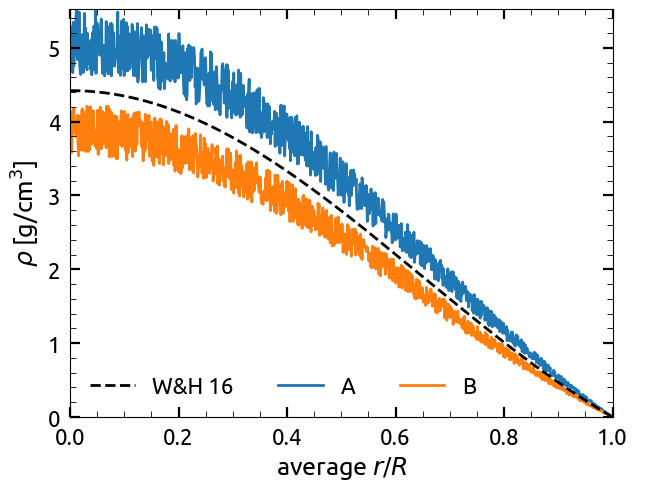

In [19]:
factorA = 2.1*(0.5+np.random.rand(X.opts['N'])/10) #random factor for new data
factorB = 1.6*(0.5+np.random.rand(X.opts['N'])/10) #random factor for new data

class literature():
    
    lis    = [X.li          , X.li          ] #radial data
    rhois  = [X.rhoi*factorA, X.rhoi*factorB] #density data
    Pis    = [X.Pi*factorA  , X.Pi*factorB  ] #pressure data
    
    colors     = ['C0', 'C1'] #colors for plotting
    linestyles = ['-' , '-' ] #linestyles for plotting
    labels     = ['A' , 'B' ] #labels for plotting
    zorders    = [0   , 0   ] #zorders for plotting

X.plot_xy(0,2, literature=literature, **mpl_kwargs, **plot_xy_kwargs)

We can depict an inset panel within the plot when $\texttt{X.plot\_xy()}$ is provided with a class $\texttt{inset\_plot\_xy}$ of the form:

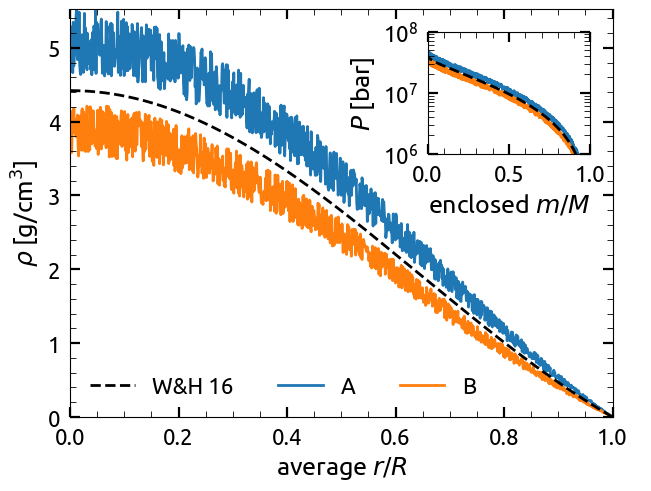

In [20]:
class inset_plot_xy():

    x = 1 #same logic as arguments for X.plot_xy()
    y = 3 #same logic as arguments for X.plot_xy()
    
    xlim = (0.0, 1.0) #xlim for the inset panel
    ylim = (1e6, 1e8) #ylim for the inset panel
            
    width          = '30%'                #width for the inset panel
    height         = '30%'                #height for the inset panel
    loc            = 'upper right'        #location for the inset panel
    borderpad      = 1.0                  #borderpad for the inset panel
    bbox_to_anchor = (0.0, 0.0, 1.0, 1.0) #bbox_to_anchor for the inset panel

X.plot_xy(0,2, literature=literature, inset_plot_xy=inset_plot_xy, **mpl_kwargs, **plot_xy_kwargs)

We can depict a colorbar next to the plot when $\texttt{X.plot\_xy()}$ is provided with a class $\texttt{colorbar}$ of the form:

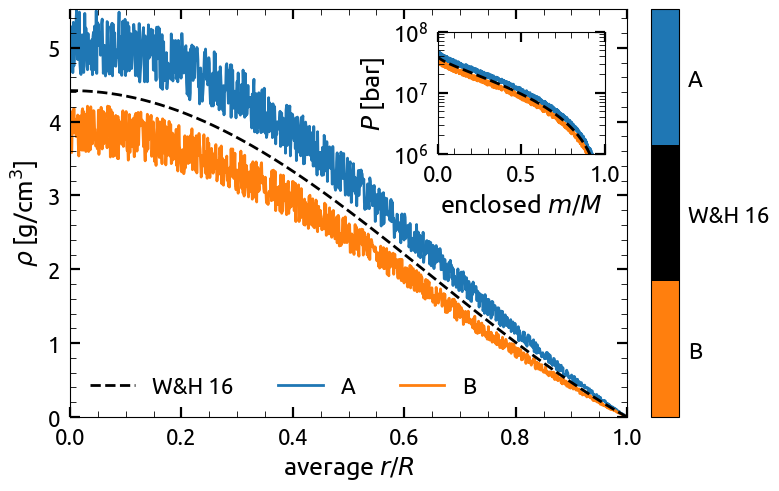

In [21]:
import matplotlib.colors as colors
import matplotlib.cm as cm

class colorbar():

    width     = 0.05                 #width of the colorbar
    stretch   = 1.20                 #stretch factor for the figure width
    label     = ''                   #label for the colorbar
    tick_lab  = ['B', 'W&H 16', 'A'] #tick labels for the colorbar axis
    tick_pos  = [0.5, 1.5, 2.5]      #tick positions for the colorbar axis
    tick_show = False                #option to hide ticks

    cmap     = colors.ListedColormap(['C1', 'black', 'C0'])   #colormap for colorbar
    norm     = colors.BoundaryNorm([0,1,2,3], ncolors=cmap.N) #norm for colorbar
    mappable = cm.ScalarMappable(norm=norm, cmap=cmap)        #mappable for colorbar

plot_xy_kwargs['do_save'] = False

X.plot_xy(0,2, literature=literature, inset_plot_xy=inset_plot_xy, colorbar=colorbar, **mpl_kwargs, **plot_xy_kwargs)

The function $\texttt{X.plot\_shape()}$ does not need any arguments and returns two plots illustrating the shape of the planet:

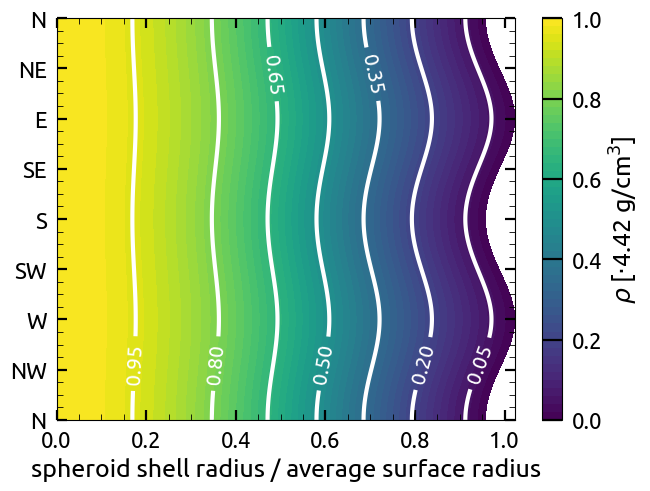

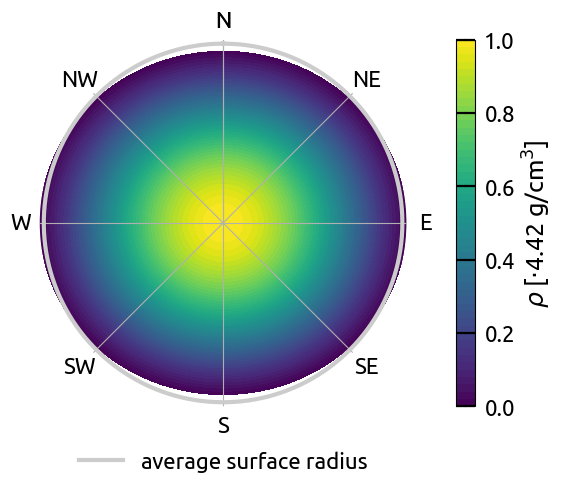

In [22]:
X.plot_shape()

There are no classes that can be provided to it. In addition to $\texttt{matplotlib}$ keywords, we can supply exactly the following further keywords:

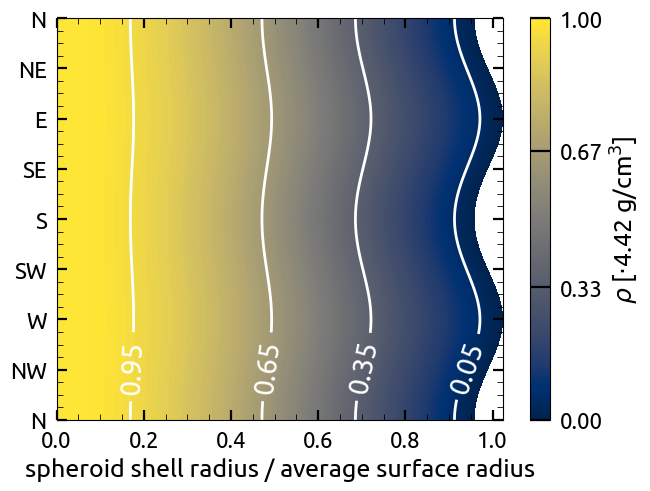

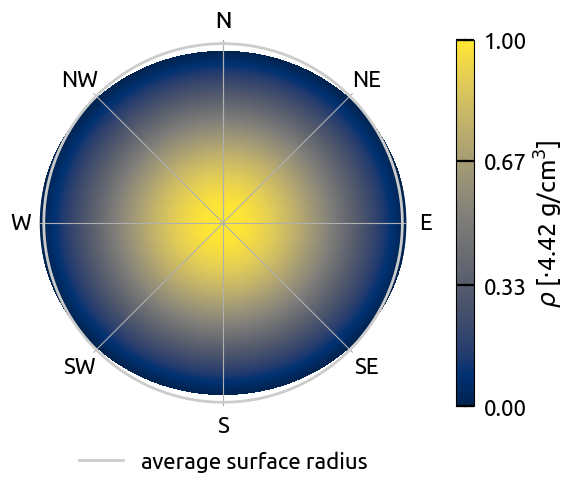

In [23]:
plot_shape_kwargs = {'contourf_levels': 100                     , 'contourf_cmap' : 'cividis' ,
                     'contour_levels' : [0.05, 0.35, 0.65, 0.95], 'contour_colors': 'white'   , 'contour_fontsize': 20          ,
                     'colorbar_ticks' : [0.00, 0.33, 0.67, 1.00],
                     'do_save'        : True                    , 'path_name'     : os.getcwd(), 'fig_name'       : 'plot_shape', 'format': 'png', 'transparent': False}

X.plot_shape(**mpl_kwargs, **plot_shape_kwargs)

The function $\texttt{X.plot\_ss()}$ does not need any arguments and returns one plots illustrating the figure functions of the planet:

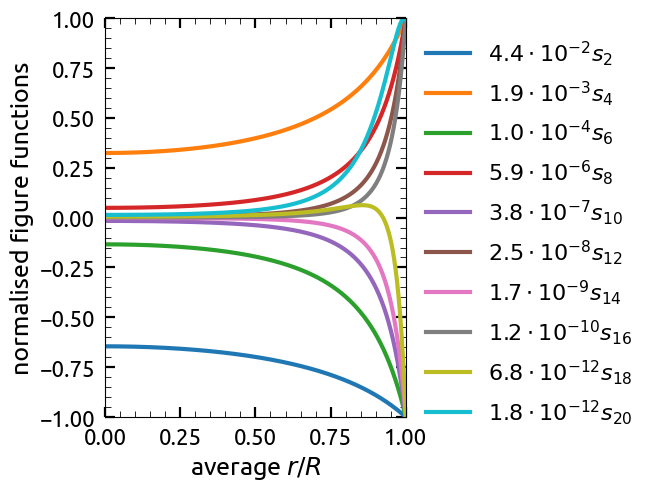

In [24]:
X.plot_ss()

There are no classes that can be provided to it. In addition to $\texttt{matplotlib}$ keywords, we can supply exactly the following further keywords:

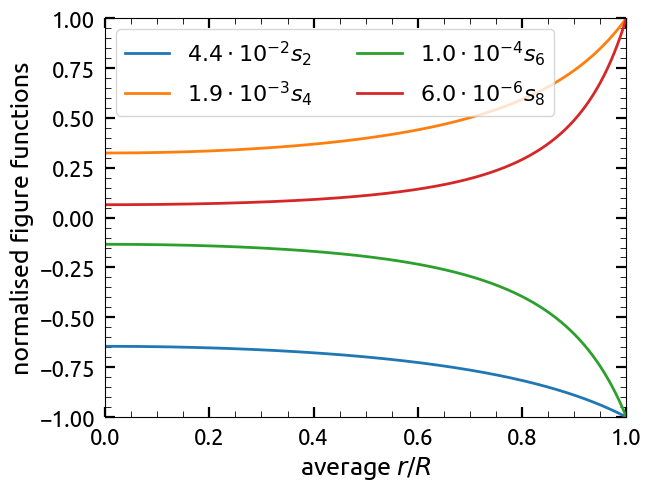

In [25]:
X._set_IC(); number_of_iterations = X.relax_to_barotrope() #rerun with lower ToF order for less figure functions

plot_ss_kwargs = {'do_legend': True, 'loc_legend': 'best'      , 'ncol_legend': 2        , 'frameon_legend': True , 'bbox_to_anchor_legend': (0.0, 0.0, 1.0, 1.0),
                  'do_save'  : True, 'path_name' : os.getcwd() , 'fig_name'   : 'plot_ss', 'format'        : 'png', 'transparent'          : False}

X.plot_ss(**mpl_kwargs, **plot_ss_kwargs)

There are no new custom plotting options. 

## Chapter 3: Advanced functionalities I
Using a custom density profile of an arbitrary planet

Instead of using a polytrope like in chapter 1, we might also want to provide a density profile directly:

In [26]:
N         = 2**10                                            #number 
density   = 1000                                             #constant density in SI units (kg/m^3)
densities = density*np.ones(N)                               #density array in SI units (kg/m^3)
radius    = 1e6                                              #outermost radius in SI units (m)
radii     = radius*np.logspace(0, -2, N)                     #radius array in SI units (m), arrays must start with the outer surface
mass      = -4*np.pi*np.trapezoid(densities*radii**2, radii) #calculated mass in SI units (kg), negative sign because array starts with the outer surface
period    = 24*60*60                                         #rotation period in SI units (s)

X = ClassToF.ToF(N=N, M_phys=mass, R_phys=[radius, 'mean'], Period=period) #all radius options: 'equatorial', 'mean', 'polar'

No reference radius supplied by the user. PyToF assumes R_ref = R_phys.


In this case we have to provide the radii, densities, and the rotational parameter $m=\frac{(2\pi / P_\text{rot})^2 l_\text{max}^3}{GM}$ directly to the class and can then relax to the shape of the planet via $\texttt{relax\_to\_shape()}$:

Number of iterations used by the algorithm: 48
PyToF solutions: ['J_2 = 9.5477e-03 +/- 1.5e-07', 'J_4 = -1.9534e-04 +/- 5.7e-08', 'J_6 = 5.1743e-06 +/- 4.4e-08', 'J_8 = -1.6401e-07 +/- 1.4e-08']


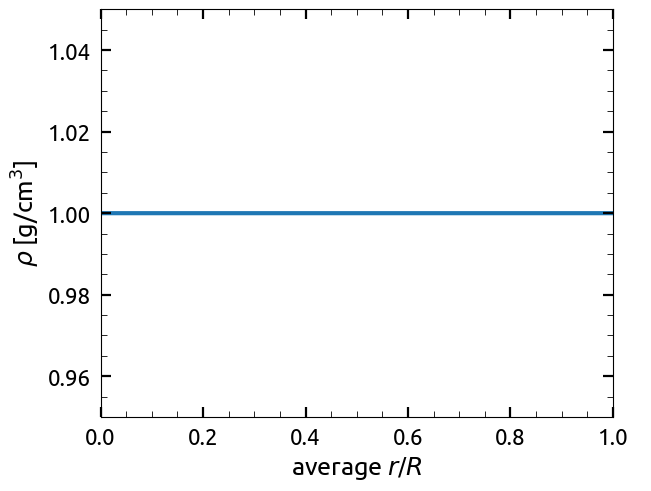

In [27]:
X.li         = radii
X.rhoi       = densities
X.m_rot_calc = (2*np.pi/period)**2*X.li[0]**3/(X.opts['G']*mass)

number_of_iterations = X.relax_to_shape()
print('Number of iterations used by the algorithm:', number_of_iterations)

X.plot_xy(0, 2)

print('PyToF solutions:', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i]) + ' +/- ' + "{:.1e}".format(X.Js_error[i]) for i in range(1,5)])

We can also define a function that parameterises the density profile:

Number of iterations used by the algorithm: 36
PyToF solutions: ['J_2 = 4.1042e-03 +/- 6.6e-08', 'J_4 = -4.2377e-05 +/- 1.2e-08', 'J_6 = 6.2380e-07 +/- 5.4e-09', 'J_8 = -1.1479e-08 +/- 1.0e-09']


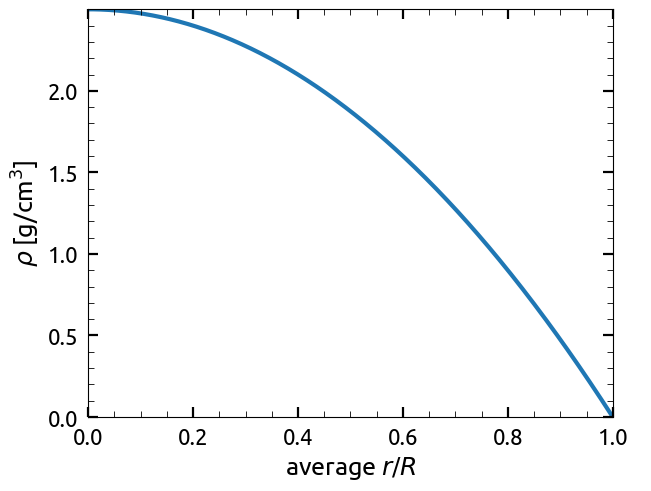

In [28]:
def dens_function(radii, mass):
    x          = radii/np.max(radii)                                     #normalised radii
    densities  = 1-x**2                                                  #density profile shape
    densities /= (-4*np.pi*np.trapezoid(densities*radii**2, radii))/mass #renormalize density profile
    return densities

X.li         = radii
X.rhoi       = dens_function(radii, mass)
X.m_rot_calc = (2*np.pi/period)**2*X.li[0]**3/(X.opts['G']*mass)

number_of_iterations = X.relax_to_shape()
print('Number of iterations used by the algorithm:', number_of_iterations)

X.plot_xy(0, 2)

print('PyToF solutions:', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i]) + ' +/- ' + "{:.1e}".format(X.Js_error[i]) for i in range(1,5)])

PyToF can apply an "atmosphere" model to a planet, a constraint on the outer part of the planet. To that end, we need supply PyToF with a function of the form:

In [29]:
def atmosphere(norm_radii, pressure, K=1e2):
    return (pressure/K)**(1/2)

The function describes the model we want to impose. It needs to have arguments of normalised average radius $l$ and of pressure $P$ in that order. It can have additional $\texttt{kwargs}$ as parameters. It needs to return a value that corresponds to a density $\rho$. Instead of calling $\texttt{relax\_to\_shape()}$ we now need to call $\texttt{relax\_to\_density()}$:

No reference radius supplied by the user. PyToF assumes R_ref = R_phys.
PyToF solutions: ['J_2 = 3.8221e-03 +/- 6.2e-08', 'J_4 = -3.6159e-05 +/- 1.1e-08', 'J_6 = 4.8190e-07 +/- 4.1e-09', 'J_8 = -7.9561e-09 +/- 7.0e-10']


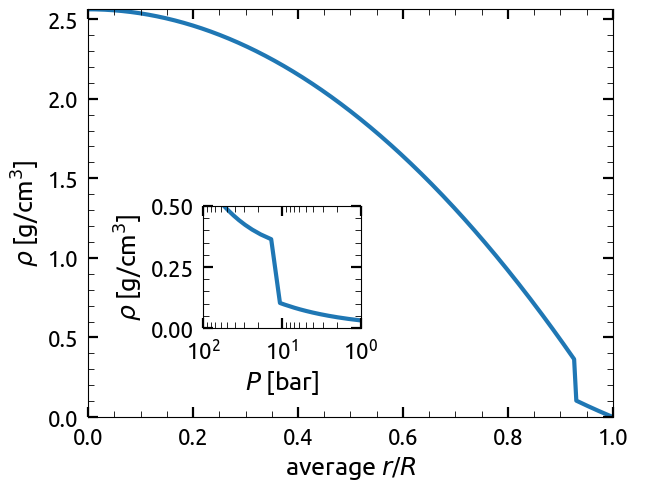

In [30]:
atmosphere_until = 1e6 #Pressure value in SI units (Pa) that marks the end of the atmospheric model

X = ClassToF.ToF(N=N, M_phys=mass, R_phys=[radius, 'mean'], Period=period, use_atmosphere=True, atmosphere=atmosphere, atmosphere_until=atmosphere_until)

X.li         = radii
X.rhoi       = dens_function(radii, mass)
X.m_rot_calc = (2*np.pi/period)**2*X.li[0]**3/(X.opts['G']*mass)

number_of_iterations = X.relax_to_density()

class inset_plot_xy():
    x = 3; y = 2
    xlim = (1e0, 1e2); ylim = (0.0,0.5)
    width = '30%'; height = '30%'; loc = 'lower left'; borderpad = 4.0; bbox_to_anchor=(0.05, 0.0, 1.0, 1.0)
X.plot_xy(0, 2, inset_plot_xy=inset_plot_xy)

print('PyToF solutions:', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i]) + ' +/- ' + "{:.1e}".format(X.Js_error[i]) for i in range(1,5)])

We see that at 10 bars the density and pressure jumps from the atmosphere model supplied by $\texttt{atmosphere()}$ to the density profile supplied by $\texttt{dens\_function()}$. For a barotrope, the analogous procedure would be:

No reference radius supplied by the user. PyToF assumes R_ref = R_phys.
PyToF solutions: ['J_2 = 2.8449e-03 +/- 4.6e-08', 'J_4 = -2.1989e-05 +/- 6.4e-09', 'J_6 = 2.5407e-07 +/- 2.2e-09', 'J_8 = -3.7724e-09 +/- 3.3e-10']


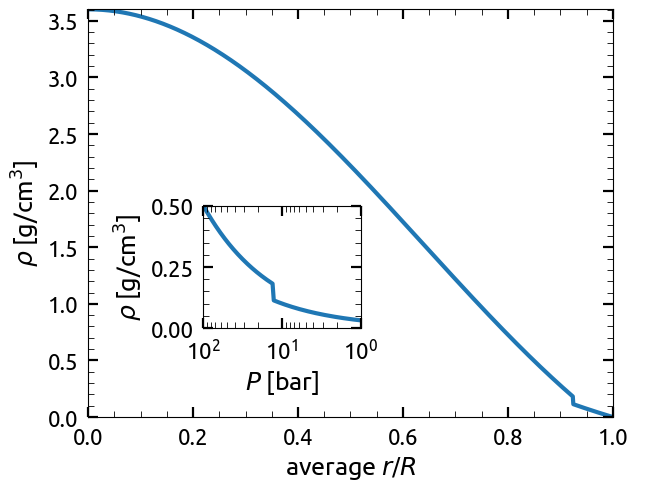

In [31]:
X = ClassToF.ToF(N=N, M_phys=mass, R_phys=[radius, 'mean'], Period=period, use_atmosphere=True, atmosphere=atmosphere, atmosphere_until=atmosphere_until, baro_param_init=[1e1])

def barotrope(P, K): 
    return np.sqrt(P/K)

X.opts['baro_param_init'] = [1] #sets K=1
X.set_barotrope(barotrope)

number_of_iterations = X.relax_to_barotrope()

X.plot_xy(0, 2, inset_plot_xy=inset_plot_xy)

print('PyToF solutions:', ['J_'+str(2*i)   +' = ' + "{:.4e}".format(X.Js[i]) + ' +/- ' + "{:.1e}".format(X.Js_error[i]) for i in range(1,5)])

## Chapter 4: Advanced functionalities II
Using the $\texttt{emcee}$ package ($\textit{Foreman-Mackey et al. 2013}$) to find solutions of Neptune

We initialize PyToF with the physical parameters of Neptune:

In [32]:
kwargs = {}

kwargs['N']         = 2**10
kwargs['G']         = 6.67430e-11                   #https://arxiv.org/pdf/2409.03787, CODATA 2022
kwargs['M_phys']    = 1.02409e+26                   #https://iopscience.iop.org/article/10.1088/0004-6256/137/5/4322/pdf, Jacobson 2009
kwargs['R_ref']     = 25225*1e3                     #https://doi.org/10.1051/0004-6361/202244537, Wang 2023
kwargs['R_phys']    = [24766*1e3, 'equatorial']     #https://articles.adsabs.harvard.edu/pdf/1992AJ....103..967L, Lindal 1992
kwargs['Period']    = 57479                         #https://doi.org/10.1016/j.icarus.2011.05.013, Karkoschka 2011
kwargs['P0']        = 1e5                           #https://articles.adsabs.harvard.edu/pdf/1992AJ....103..967L, Lindal 1992
kwargs['Target_Js'] = [3401.655e-6, -33.294e-6]     #https://doi.org/10.1051/0004-6361/202244537, Wang 2023
kwargs['Sigma_Js']  = [   3.994e-6,  10.000e-6]     #https://doi.org/10.1051/0004-6361/202244537, Wang 2023

def atmosphere(norm_radii, pressure, param=[5.48841758e+05, 5.30367196e+00]): #https://arxiv.org/abs/2111.15494, Hueso 2021
    return (pressure/param[0])**(param[1]/(param[1]+1))
    
kwargs['use_atmosphere']   = True
kwargs['atmosphere']       = atmosphere
kwargs['atmosphere_until'] = 1e7

X = ClassToF.ToF(**kwargs)

We now look for 3-polytrope solutions of Neptune. $\texttt{emcee}$ is a Markov-Chain-Monte-Carlo algorithm that will look for the parameters characterizing the three polytropes such that the gravitational moments $\texttt{Target\_Js}$ are fitted within the uncertainties $\texttt{Sigma\_Js}$. We provide a barotrope function and some initial parameter values that are roughly of the correct order of magnitude:

In [33]:
def barotrope(P, param=None):
    rho = np.zeros_like(P)
    rho[:round(param[0]) ] = (P[:round(param[0]) ] / param[2])**(param[5] / (param[5] + 1))
    rho[ round(param[0]):] = (P[ round(param[0]):] / param[3])**(param[6] / (param[6] + 1))
    rho[ round(param[1]):] = (P[ round(param[1]):] / param[4])**(param[7] / (param[7] + 1))
    return rho

baro_param_init = np.array([kwargs['N']/2, kwargs['N']/2, #transition radii indeces
                            2e5, 2e5, 2e5,                #bulk moduli, up to a renormalisation constant
                            0.5, 0.5, 0.5])*2             #exponents

Additionally, we need to tell $\texttt{emcee}$ which values the parameters are allowed to take. This is done via the function $\texttt{check\_baro\_param}$. It returns:
 - True  if a parameter value is out of bounds
 - False if all paramater values are within the allowed bounds

In our case, the function takes the form:

In [34]:
def check_baro_param(param):

    if   (param[0] < 0) or (param[0] > kwargs['N']) or (param[1]  < 0) or (param[1] > kwargs['N']):
        return True #transition radii out of bounds

    elif (param[2] < 0) or (param[3] < 0) or (param[4]  < 0):
        return True #negative bulk moduli

    elif (param[5] < 0) or (param[6] < 0) or (param[7]  < 0):
        return True #negative exponents

    else:
        return False

Now we give everything to the PyToF class:

In [35]:
X.opts['baro_param_init'] = baro_param_init
X.set_barotrope(barotrope)
X.set_check_param(check_baro_param)

The MCMC algorithm is started by calling $\texttt{X.run\_baro\_MC()}$ in the case of a barotrope model. We can tell it how many walkers ($\texttt{nwalkers}$) it should use and how many steps ($\texttt{steps}$) these should take. In addition, we can perform the calculation in a parallel manner by setting $\texttt{parallelize=True}$ and specifying the amount of cores ($\texttt{Ncores}$).

$\texttt{X.run\_baro\_MC()}$ returns two variables: $\texttt{state}$ is an array that contains $\texttt{nwalkers}$ many parameter arrays. Depending on the amount of $\texttt{steps}$ taken, some of them may represent a model of Neptune that fits the measured gravitational moments within the uncertainties. $\texttt{autocorr}$ is an array containing an autocorrelation time estimate $\tau$ sampled every 100 steps. See https://emcee.readthedocs.io/en/stable/tutorials/monitor/ for more details. For less than 100 steps taken, $\texttt{autocorr}$ will be empty:

In [36]:
nwalkers        = 20
steps           = 200
Ncores          = 8
parallelize     = True

state_baro, autocorr_baro = X.run_baro_MC(nwalkers, steps, Ncores=Ncores, parallelize=parallelize)

print('Shape of the MCMC state, equal to (nwalkers, len(baro_param_init)):       ', np.shape(state_baro))
print('Shape of the autocorrelation time estimate array, sampled every 100 steps:', np.shape(autocorr_baro))

/home/lumo/.local/lib/python3.10/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]


Shape of the MCMC state, equal to (nwalkers, len(baro_param_init)):        (20, 8)
Shape of the autocorrelation time estimate array, sampled every 100 steps: (2,)


For larger calculations, it is advisable to use $\texttt{X.opts['verbosity']=1}$ or $\texttt{X.opts['verbosity']=2}$ to monitor the progress. $\texttt{X.classify\_and\_save\_state()}$ is a built-in function that both classifies the final MCMC state and can save the arrays $\texttt{X.li}$, $\texttt{X.rhoi}$, $\texttt{X.Pi}$ to a $\texttt{.txt}$ file. It also returns a lot of verbosity output, which we can see by adjusting the corresponding option:

In [37]:
X.opts['verbosity'] = 1
matches_observed_Js_baro, rho_maxs_baro = X.classify_and_save_state(state_baro, 'baro')
X.opts['verbosity'] = 0

print(len(matches_observed_Js_baro[matches_observed_Js_baro]), 'walker(s) match(es) the gravity data.')

                                                                                                                  
Walker #0 yields a total cost of -2.49e+00.
              J2          J4     
My code: 3.40335e-03 -4.84831e-05 
Target:  3.40165e-03 -3.32940e-05 

                                                                                                                  
Walker #1 yields a total cost of -1.68e+00.
              J2          J4     
My code: 3.39945e-03 -4.50082e-05 
Target:  3.40165e-03 -3.32940e-05 

                                                                                                                  
Walker #2 yields a total cost of -7.13e+05.
              J2          J4     
My code: 6.77497e-03 -1.09603e-04 
Target:  3.40165e-03 -3.32940e-05 

                                                                                                                  
Walker #3 yields a total cost of -1.94e+00.
              J2          J4     
My code: 3.4060

The total cost is calculated as $\sum_{n} \frac{\left( J_{2n,\text{PyToF}} - J_{2n,\text{data}} \right)^2}{\left( \sigma_{J_{2n},\text{data}} \right)^2}$. In order to actually save the afforementioned arrays, we would need to call:

In [38]:
#matches_observed_Js_baro, rho_maxs_baro = X.classify_and_save_state(state_baro, 'baro', what_save='all', log_CGS_units=True, path_name=os.getcwd(), file_name='sol_li_logRhoi_logPi')

Passing $\texttt{log\_CGS\_units=True}$ means that the values in the saved files are stored using CGS units instead of SI units. Additionally, $\log_{10}$ is applied to the densities and pressures. The default $\texttt{log\_CGS\_units=False}$ leads to no $\log_{10}$ applications and SI units being used. Allowed values of $\texttt{what\_save}$ are:

 - $\texttt{'all'}$: the radii, densities and pressures of all walkers are saved
 - $\texttt{'good'}$: the radii, densities and pressures of walkers matching the gravity data are saved
 - $\texttt{'none'}$: default, no files are saved

A simple example using a density profile with $\rho(l_\text{max})=0$ instead of a barotrope employing $\texttt{X.run\_dens\_MC()}$. Note that the $\texttt{param}$ correspond to increases of density per step in this example:

In [39]:
def dens_function(radii, mass, param=None):
    x = radii/np.max(radii)
    param = np.concatenate(([0], param))
    densities = np.interp(x, np.linspace(0, 1, len(param)), np.cumsum(param)[::-1])
    densities = densities/(-4*np.pi*np.trapezoid(densities*radii**2, radii))/mass
    return densities

def check_dens_param(param):
    if np.any(param<0):
        return True
    return False

X.opts['dens_param_init'] = [1]*9
X.set_density_function(dens_function)
X.set_check_param(check_dens_param)

state_dens, autocorr_dens = X.run_dens_MC(nwalkers, steps, Ncores=Ncores, parallelize=parallelize)

matches_observed_Js_dens, rho_maxs_dens = X.classify_and_save_state(state_dens, 'dens')

print(len(matches_observed_Js_dens[matches_observed_Js_dens]), 'walker(s) match(es) the gravity data.')

13 walker(s) match(es) the gravity data.


## Chapter 5: Built-in plotting functionalities II
Plotting Neptune solution candidates according to their agreement with physical data

PyToF provides the function $\texttt{X.plot\_state\_xy()}$ for plotting. The default plotting options are listed in $\texttt{\_default\_}$-functions in the file $\texttt{PlotToF.py}$. The function $\texttt{X.plot\_state\_xy()}$ needs two integer numbers $x,y \in \{0,1,2,3\}$ as arguments that correspond to:

 - 0: Average normalized radii of the spheroid shells
 - 1: Mass enclosed by the spheroid shells
 - 2: Densities of the spheroid shells
 - 3: Pressures of the spheroid shells

Additionally, $\texttt{X.plot\_state\_xy()}$ needs to be supplied with

 - An array $\texttt{state}$ of shape (number of candidates, $\texttt{len(baro\_param\_init)}$ or $\texttt{len(dens\_param\_init)}$), see chapter 4
 - A string $\texttt{what\_model} \in \{ \texttt{'baro'}, \texttt{'dens'} \}$ specyfing if the parameters correspond to a barotrope or density model, see chapter 4

Therefore to plot e.g. the densities of the spheroid shells as a function of the average normalized radii of the spheroid shells for multiple candidate barotrope solutions, we call:

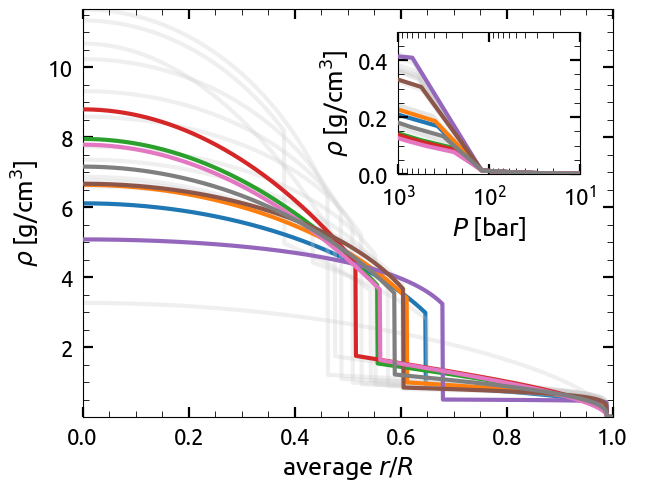

In [40]:
class inset_plot_xy():
    x = 3; y = 2 
    xlim = (1e1, 1e3); ylim = (0.0,0.5)
    width = '35%'; height = '35%'; loc = 'upper right'; borderpad = 1.0; bbox_to_anchor = (0.0, 0.0, 0.98, 1.0)

X.plot_state_xy(0, 2, state_baro, 'baro', inset_plot_xy=inset_plot_xy)

The walkers that do not match the gravity data are fainted out. Candidate density solutions:

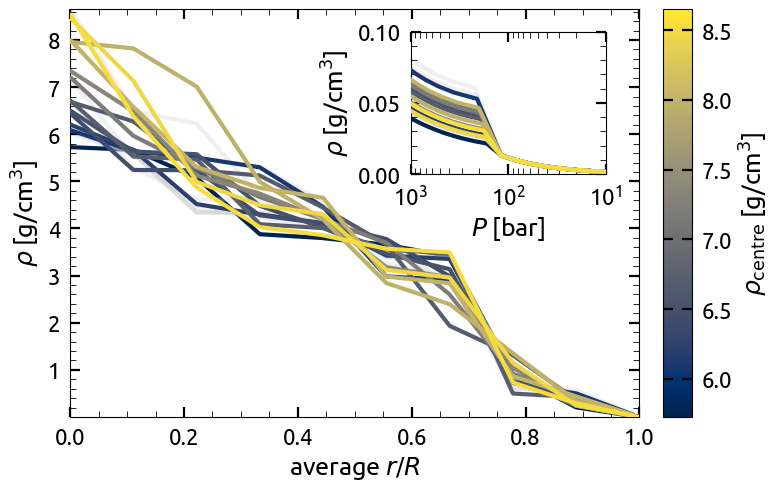

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plot_xy_kwargs = {'do_save': True, 'path_name': os.getcwd(), 'fig_name': 'plot_state_xy', 'format': 'png', 'transparent': False}

inset_plot_xy.ylim = (0.0,0.1)

class colorbar():

    sort_by = rho_maxs_dens #what to sort by
    
    width = 0.05; stretch = 1.2; label = r'$\rho_\text{centre}$ [g/cm$^3$]'
    cmap = plt.get_cmap('cividis'); mappable = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(rho_maxs_dens)/1000, vmax=max(rho_maxs_dens)/1000))

X.plot_state_xy(0, 2, state_dens, 'dens', inset_plot_xy=inset_plot_xy, colorbar=colorbar, **plot_xy_kwargs)

The function $\texttt{X.plot\_state\_corr\_xy()}$ needs two integer numbers $\texttt{x},\texttt{y}$ as arguments that correspond to:

 - the gravitational moments $J_{2\texttt{x}}$ or $J_{2\texttt{y}}$ if $2\texttt{x}$ or $2\texttt{y}$ is smaller or equal to the largest calculated gravitational moment by PyToF
 - the values $b_i$ in the $\texttt{state}$ array if $2\texttt{x}$ or $2\texttt{y}$ are larger than the largest calculated gravitational moment by PyToF

Additionally, $\texttt{X.plot\_state\_corr\_xy()}$ needs to be supplied with

 - An array $\texttt{state}$ of shape (number of candidates, $\texttt{len(baro\_param\_init)}$ or $\texttt{len(dens\_param\_init)}$), see chapter 4
 - A string $\texttt{what\_model} \in \{ \texttt{'baro'}, \texttt{'dens'} \}$ specyfing if the parameters correspond to a barotrope or density model, see chapter 4

$\texttt{X.plot\_state\_corr\_xy()}$ depicts the correlation between the two specified arguments in addition to their corresponding histograms. It can be supplied with $\texttt{sigma\_lim}$ as a parameter, which is equal to $\texttt{np.inf}$ by default. A finite number for $\texttt{sigma\_lim}$ excludes data points outside the specified sigma range calculated using $\texttt{np.std}$.

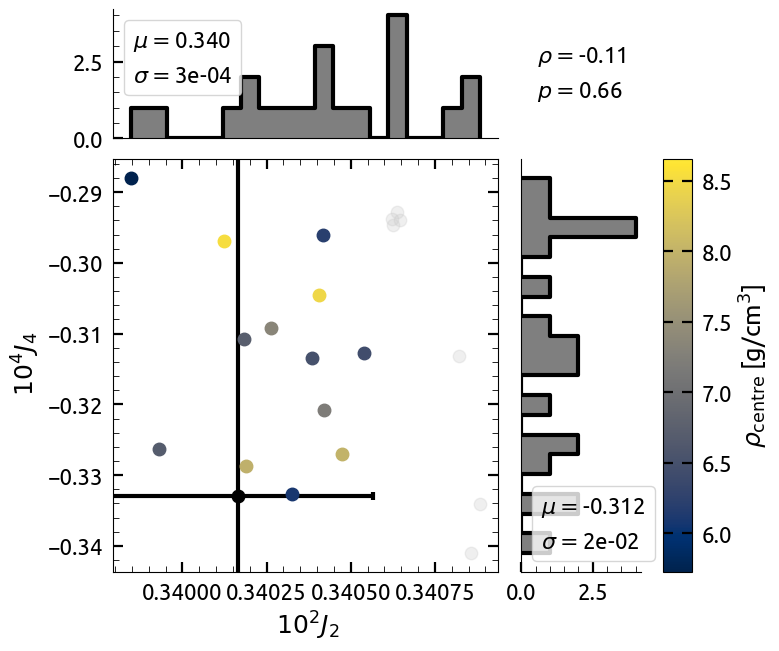

In [42]:
plot_xy_kwargs = {'do_legend': True, 'do_save': True, 'path_name': os.getcwd(), 'fig_name': 'plot_state_corr_xy', 'format': 'png', 'transparent': False}
colorbar.width = 0.3

X.plot_state_corr_xy(1, 2, state_dens, 'dens', colorbar=colorbar, **plot_xy_kwargs)

Setting $\texttt{legend=True}$ reveals the mean $\mu$ and standard deviation $\sigma$ in the histograms. The calculated Spearman correlation coefficient $\rho$ with associated $p$-value are always shown. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html for further information.

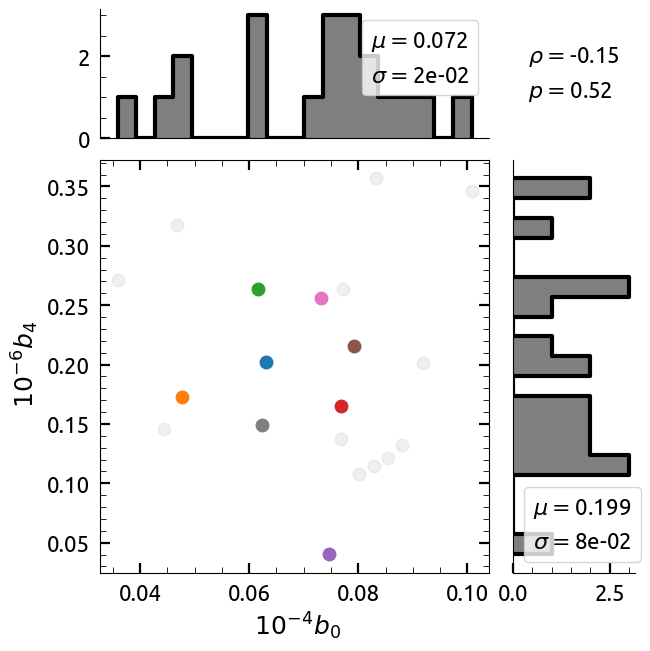

In [43]:
plot_xy_kwargs['do_save'] = False

X.plot_state_corr_xy(5, 9, state_baro, 'baro', **plot_xy_kwargs)

Finally, we can analyse the autocorrelation estimates according to https://emcee.readthedocs.io/en/stable/tutorials/autocorr/ and https://emcee.readthedocs.io/en/stable/tutorials/monitor/. Note that for this case with only 200 steps the analysis is not fruitful. Oversimplified, MCMC convergence is (likely) reached as soon as the estimate (blue) line crosses the dashed black line:

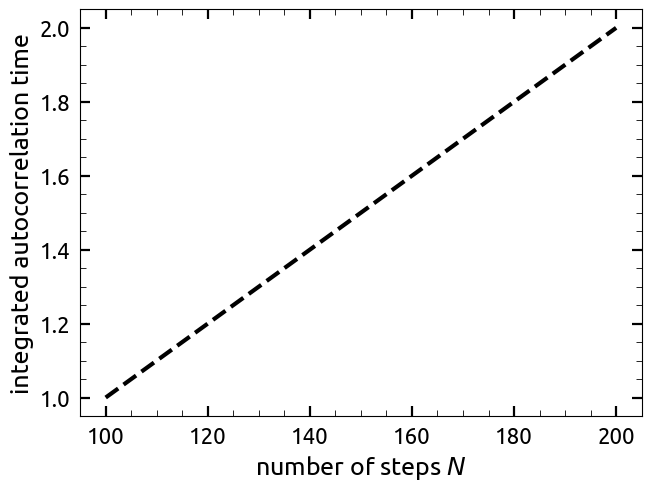

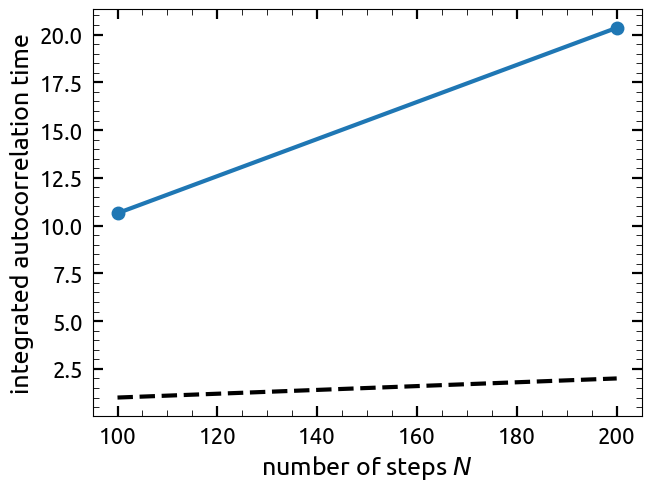

In [44]:
X.plot_autocorr(autocorr_baro)
X.plot_autocorr(autocorr_dens)